<a href="https://colab.research.google.com/github/ArySuby/Proyecto_CoderDS_SUBY_Ary2daparte/blob/main/merluza_modelo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
# --- Setup inicial ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [107]:
from google.colab import files
uploaded = files.upload()

Saving merluzacomercialfiltr.xlsx to merluzacomercialfiltr.xlsx


In [108]:
df = pd.read_excel("merluzacomercialfiltr.xlsx", parse_dates=["fecha"])

In [109]:
df["sexo"] = df["sexo"].astype(str).str.strip()


In [110]:
print(df["sexo"].unique())

['1' '2']


In [111]:
print(df["sexo"].value_counts(dropna=False))


sexo
2    24007
1    18405
Name: count, dtype: int64


In [112]:
print(df["largo_tot"].min())


15


In [113]:
print([int(x) for x in sorted(df["largo_tot"].unique())])


[15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 84, 85, 88, 89]


In [114]:
# --- Previsualizar ---
print("Primeras filas:")
print(df.head())
print(len(df))
print("\nColumnas disponibles:", df.columns.tolist())

Primeras filas:
       fecha  n_ejemp  largo_tot sexo  edad
0 2020-02-10        1         17    1     1
1 2020-02-10        2         15    1     1
2 2020-02-10        3         34    1     3
3 2020-02-10        4         32    1     3
4 2020-02-10        5         33    1     2
42412

Columnas disponibles: ['fecha', 'n_ejemp', 'largo_tot', 'sexo', 'edad']


In [172]:
# --- Preprocesamiento ---
# Convertir fecha a datetime
df["fecha"] = pd.to_datetime(df["fecha"], errors='coerce')

# Eliminar filas con valores faltantes en columnas relevantes
df = df.dropna(subset=["largo_tot", "sexo", "edad", "fecha"])

In [173]:
# Variables predictoras y objetivo
X = df[["largo_tot", "sexo"]].copy()
y = df["edad"]

# Codificar sexo
X["sexo"] = X["sexo"].astype("category").cat.codes

In [174]:
# --- División de datos ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [175]:
# --- Modelo Lineal ---
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# --- Modelo No Lineal (Random Forest) ---
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [176]:
# --- Evaluación ---
def evaluar_modelo(nombre, y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"\n{nombre} - RMSE:", rmse)
    print(f"{nombre} - R2:", r2)

evaluar_modelo("Regresión Lineal", y_test, y_pred_lr)
evaluar_modelo("Random Forest", y_test, y_pred_rf)


Regresión Lineal - RMSE: 0.7186487786035995
Regresión Lineal - R2: 0.7491961604240607

Random Forest - RMSE: 0.6614966248109138
Random Forest - R2: 0.7875014052214523


In [177]:
# Coeficientes del modelo
coeficientes = pd.DataFrame(lr.coef_, X.columns, columns=["Coeficiente"])
print(coeficientes)

           Coeficiente
largo_tot     0.130051
sexo         -0.484274


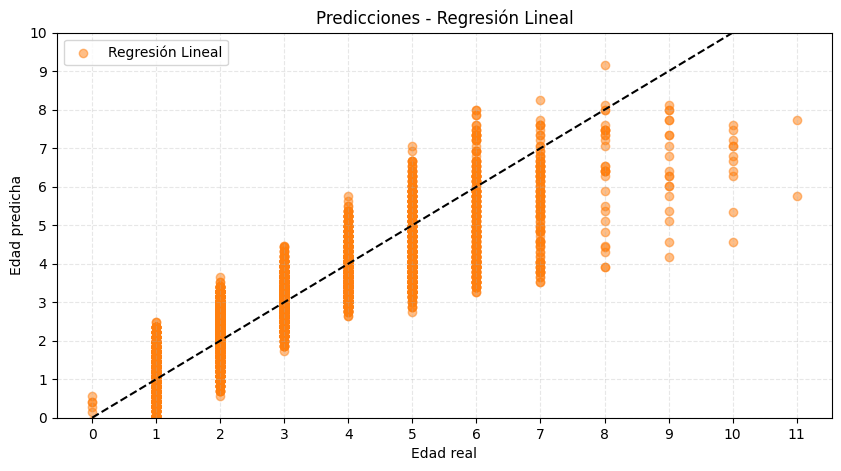

In [178]:
# --- Visualización solo para Regresión Lineal ---
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label="Regresión Lineal", color='C1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')

plt.xlabel("Edad real")
plt.ylabel("Edad predicha")
plt.legend()
plt.title("Predicciones - Regresión Lineal")

# Establecer ticks de a uno en uno
plt.xticks(np.arange(y_test.min(), y_test.max() + 1, 1))
plt.yticks(np.arange(0, 11, 1))
plt.ylim(0, 10)
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

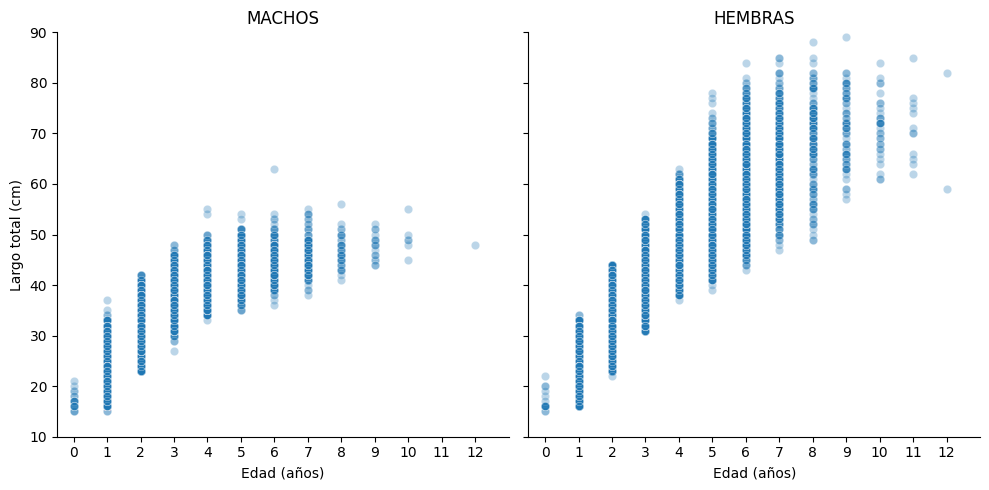

In [179]:
# Diccionario para los títulos y colores
sexo_labels = {1: "MACHOS", 2: "HEMBRAS"}
colores = {1: "blue", 2: "red"}

# FacetGrid por sexo con palette para los colores
g = sns.FacetGrid(df, col="sexo", height=5, aspect=1, palette=colores)

# Usar map_dataframe para graficar con ejes invertidos
g.map_dataframe(sns.scatterplot, x="edad", y="largo_tot", alpha=0.3)

# Etiquetas y ejes
g.set_axis_labels("Edad (años)", "Largo total (cm)")
g.set(xticks=np.arange(0, 13, 1))       # Eje X (edad): de 0 a 12, paso 1
g.set(xlim=(-0.5, 13))                  # Limites del eje X
g.set(yticks=np.arange(10, 91, 10))      # Eje Y (largo): de 10 a 90, paso 5
g.set(ylim=(10, 90))                    # Limites del eje Y

# Reemplazar títulos por MACHOS y HEMBRAS
for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(sexo_labels[int(title)])

plt.tight_layout()
plt.show()


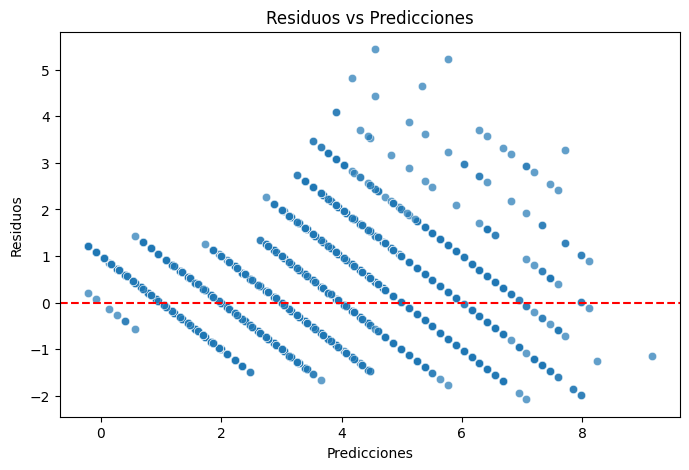

In [180]:
###SUPUESTOS A CUMPLIR###
#### 1-Linealidad: la relación entre las variables predictoras y la variable objetivo es lineal.###
#### 2-Homoscedasticidad: los residuos deben tener varianza constante.####

# Calcular residuos
y_pred = lr.predict(X_test)
residuos = y_test - y_pred

# Gráfico de residuos vs predicciones
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Residuos vs Predicciones")
plt.show()


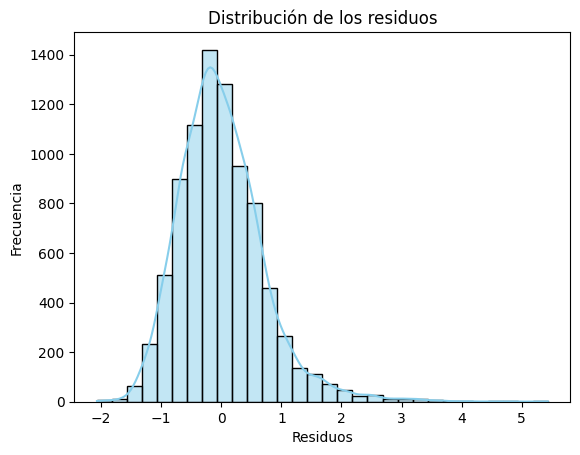

In [181]:
####SUPUESTO 3 - Prueba de normalidad de los residuos###
sns.histplot(residuos, kde=True, bins=30, color='skyblue')
plt.title("Distribución de los residuos")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()


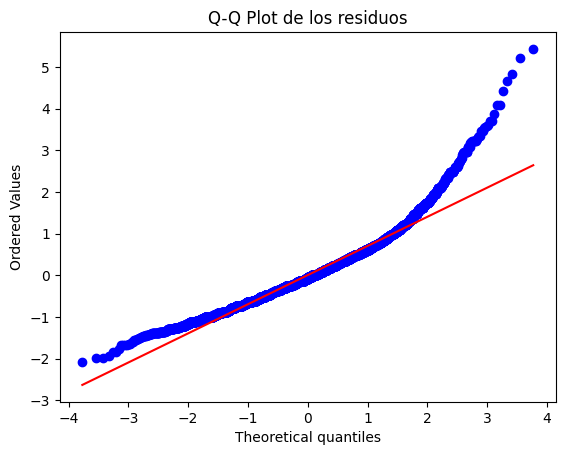

In [182]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los residuos")
plt.show()


<Axes: xlabel='residuos', ylabel='Count'>

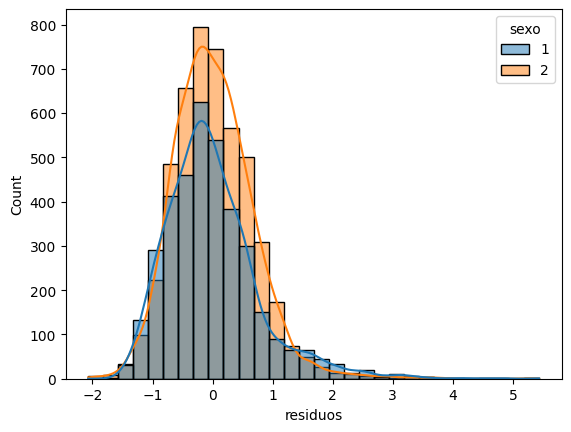

In [183]:
df["residuos"] = residuos
sns.histplot(data=df, x="residuos", hue="sexo", kde=True, bins=30)

Porcentaje de acierto - Regresión Lineal: 72.38%


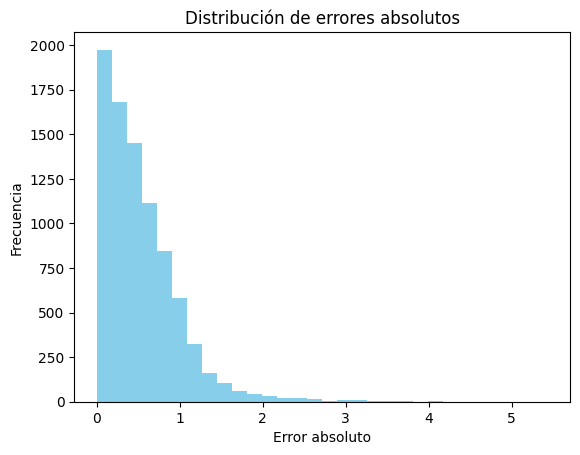

In [184]:
# Predicciones del modelo lineal
predicciones_lr = y_pred_lr

# 30% de margen de error
margen_error = 0.30
limite_superior = y_test * (1 + margen_error)
limite_inferior = y_test * (1 - margen_error)

# Calcular aciertos
aciertos = (predicciones_lr >= limite_inferior) & (predicciones_lr <= limite_superior)
porcentaje_acierto_lr = aciertos.mean() * 100
print(f"Porcentaje de acierto - Regresión Lineal: {porcentaje_acierto_lr:.2f}%")

# Calcular errores absolutos y graficar histograma
errores = abs(y_test - predicciones_lr)
plt.hist(errores, bins=30, color='skyblue')
plt.xlabel("Error absoluto")
plt.ylabel("Frecuencia")
plt.title("Distribución de errores absolutos")
plt.show()

In [185]:
percentil_95 = np.percentile(errores, 95)
print(f"El percentil 95 de los errores es: {percentil_95}")

El percentil 95 de los errores es: 1.3466602671057504


In [186]:
# Calcular los errores absolutos
errores = abs(y_test - y_pred_lr)

# Verificar algunos de los primeros errores para asegurarse de que no sean NaN
print(errores.head())

3457     0.996917
42050    0.092724
22990    0.482878
22585    0.258706
473      1.133135
Name: edad, dtype: float64


In [187]:
errores_grandes = errores[errores > percentil_95]
print(f"Errores grandes (> {percentil_95}):")
print(errores_grandes)

Errores grandes (> 1.3466602671057504):
11698    1.570832
26547    5.229908
34164    2.799344
42279    1.866865
4379     1.606763
           ...   
22669    1.736814
18838    1.476712
13903    1.476712
42403    1.476712
26500    2.346660
Name: edad, Length: 413, dtype: float64


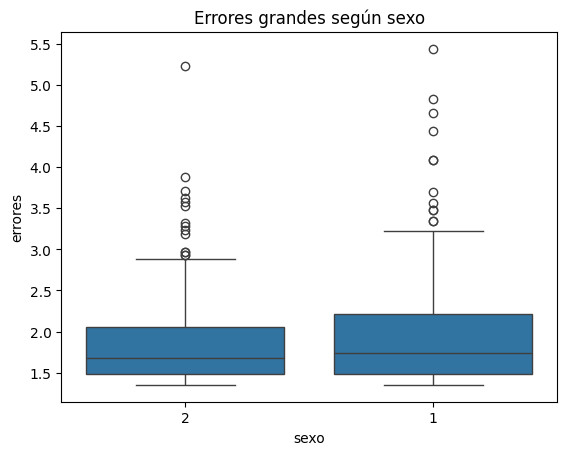

In [189]:
# Agregar sexo como categoría
df_con_errores["sexo"] = df_con_errores["sexo"].astype("category")

# Comparar errores por sexo
sns.boxplot(data=outliers, x="sexo", y="errores")
plt.title("Errores grandes según sexo")
plt.show()

In [190]:
errores_muy_grandes = df_con_errores[df_con_errores["errores"] > 4]
print(f"Cantidad de errores > 4: {len(errores_muy_grandes)}")
print(errores_muy_grandes)

Cantidad de errores > 4: 7
           fecha  n_ejemp  largo_tot sexo  edad  residuos  largo2  \
26547 2022-07-12      102         62    2    11  5.229908    3844   
42173 2024-02-06      102         44    1     8  4.086558    1936   
27828 2023-10-30       68         49    1     9  4.436301    2401   
13042 2019-08-08       51         44    1     8  4.086558    1936   
12229 2022-07-11       47         55    1    10  4.655993    3025   
12865 2022-08-22       84         49    1    10  5.436301    2401   
42067 2024-02-05      120         46    1     9  4.826455    2116   

                                              largo_sexo   errores  
26547  2222222222222222222222222222222222222222222222...  5.229908  
42173       11111111111111111111111111111111111111111111  4.086558  
27828  1111111111111111111111111111111111111111111111111  4.436301  
13042       11111111111111111111111111111111111111111111  4.086558  
12229  1111111111111111111111111111111111111111111111...  4.655993  
12865 

In [191]:
# Variables predictoras y objetivo
X = df[["largo_tot", "sexo"]]
y = df["edad"]

# Codificar sexo (si no se hizo antes)
X["sexo"] = X["sexo"].astype("category").cat.codes

# Crear el modelo de regresión lineal
lr = LinearRegression()

# Aplicar validación cruzada (5-Fold)
from sklearn.model_selection import cross_val_score
import numpy as np

# Validación cruzada con 5 folds
scores = cross_val_score(lr, X, y, cv=5, scoring="neg_mean_squared_error")

# Usamos MSE negativo para que sea compatible con los métodos de maximización
# Convertir los valores negativos a positivos y obtener el RMSE
rmse_scores = np.sqrt(-scores)

# Imprimir los resultados
print(f"RMSE por cada fold: {rmse_scores}")
print(f"RMSE promedio: {rmse_scores.mean()}")

# Opcional: Puedes calcular el R² también
r2_scores = cross_val_score(lr, X, y, cv=5, scoring="r2")
print(f"R² promedio: {r2_scores.mean()}")


<ipython-input-191-f15f28f0706b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["sexo"] = X["sexo"].astype("category").cat.codes


RMSE por cada fold: [0.70119665 0.70597367 0.74790571 0.75379544 0.75957634]
RMSE promedio: 0.7336895602833444
R² promedio: 0.7324936752962353
